In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import numpy as np 


In [2]:
df = pd.read_csv('vectorized_data.zip')

sample_len = df[df['Assessment reports Score'] == 2].shape[0]

sample_3 = df[df['Assessment reports Score'] == 3].sample(n= sample_len)
sample_4 = df[df['Assessment reports Score'] == 4].sample(n= sample_len)

#concatenate the dataframes
df = pd.concat([df[df['Assessment reports Score'] == 2], sample_3, sample_4], axis=0)

In [3]:
# X exclude categorical data
X = df[['time_stamp','flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog',
       'smog_index', 'automated_readability_index', 'coleman_liau_index',
       'dale_chall_readability_score', 'linsear_write_formula', 'hdd', 'Summer', 'Dugast', 'words_count',
       'unique_words', 'ttr', 'rttr', 'cttr', 'mtld', 'herdan', 'maas', 
       'vec_1', 'vec_2', 'vec_3', 'vec_4', 'vec_5', 'vec_6', 'vec_7', 'vec_8',
       'vec_9', 'vec_10', 'vec_11', 'vec_12', 'vec_13', 'vec_14', 'vec_15',
       'vec_16', 'vec_17', 'vec_18', 'vec_19', 'vec_20']]
y = df['Assessment reports Score']
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [4]:
y.value_counts()

2    21104
3    21104
4    21104
Name: Assessment reports Score, dtype: int64

In [5]:
scaler = StandardScaler()

#Fit the StandardScaler to the training data
x_train = scaler.fit_transform(x_train)

# Apply the StandardScaler ti the test data
x_test = scaler.transform(x_test)

In [6]:
# turn the grade class from 1-5 to 0-4
y_train = y_train - 1
y_test = y_test -1

In [7]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=5) 
y_test = to_categorical(y_test, num_classes=5)

In [8]:
# import keras modules
from keras.models import Sequential
from keras.layers import Dense

In [15]:
from tensorflow.keras.layers import BatchNormalization
# define vars
input_num_units = 40
hidden1_num_units = 500
hidden2_num_units = 500
hidden3_num_units = 500
hidden4_num_units = 500
hidden5_num_units = 500
output_num_units = 5

epochs = 20
batch_size = 128

model = Sequential([
 Dense(units=hidden1_num_units, input_dim=input_num_units, activation='relu', kernel_initializer='he_normal'),
 BatchNormalization(),
 Dense(units=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dense(units=hidden5_num_units, input_dim=hidden4_num_units, activation='sigmoid'),
 Dense(units=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])


In [16]:
from keras.optimizers import SGD

model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

trained_model_5d = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/20


2023-03-26 12:06:39.093866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


371/371 [==============================] - ETA: 0s - loss: 1.0587 - accuracy: 0.4425

2023-03-26 12:06:50.254719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


371/371 [==============================] - 14s 34ms/step - loss: 1.0587 - accuracy: 0.4425 - val_loss: 1.0417 - val_accuracy: 0.4594
Epoch 2/20
371/371 [==============================] - 12s 34ms/step - loss: 1.0303 - accuracy: 0.4663 - val_loss: 1.0386 - val_accuracy: 0.4556
Epoch 3/20
371/371 [==============================] - 12s 33ms/step - loss: 1.0153 - accuracy: 0.4794 - val_loss: 1.0359 - val_accuracy: 0.4580
Epoch 4/20
371/371 [==============================] - 12s 33ms/step - loss: 1.0042 - accuracy: 0.4923 - val_loss: 1.0415 - val_accuracy: 0.4530
Epoch 5/20
371/371 [==============================] - 9s 25ms/step - loss: 0.9905 - accuracy: 0.5020 - val_loss: 1.0386 - val_accuracy: 0.4601
Epoch 6/20
371/371 [==============================] - 12s 31ms/step - loss: 0.9730 - accuracy: 0.5169 - val_loss: 1.0575 - val_accuracy: 0.4526
Epoch 7/20
371/371 [==============================] - 13s 36ms/step - loss: 0.9541 - accuracy: 0.5328 - val_loss: 1.0578 - val_accuracy: 0.4549
Epoc

In [17]:
trained_model_5d.history

{'loss': [1.0586904287338257,
  1.0302873849868774,
  1.0153454542160034,
  1.0041968822479248,
  0.9904599785804749,
  0.972984790802002,
  0.9541493058204651,
  0.9266058206558228,
  0.8943736553192139,
  0.8564866781234741,
  0.812161922454834,
  0.7603601813316345,
  0.7038068175315857,
  0.6450193524360657,
  0.5821702480316162,
  0.5229842066764832,
  0.4636200964450836,
  0.40614742040634155,
  0.359806090593338,
  0.3160009980201721],
 'accuracy': [0.44252803921699524,
  0.4663255214691162,
  0.47938254475593567,
  0.4922921657562256,
  0.502042829990387,
  0.5168688893318176,
  0.532768964767456,
  0.555197536945343,
  0.5781105756759644,
  0.604414165019989,
  0.6318339109420776,
  0.664181649684906,
  0.6973296403884888,
  0.730330228805542,
  0.7637730836868286,
  0.7916982769966125,
  0.8221506476402283,
  0.8515290021896362,
  0.8711144924163818,
  0.8916056156158447],
 'val_loss': [1.0416642427444458,
  1.0386087894439697,
  1.0358937978744507,
  1.0415477752685547,
  1.

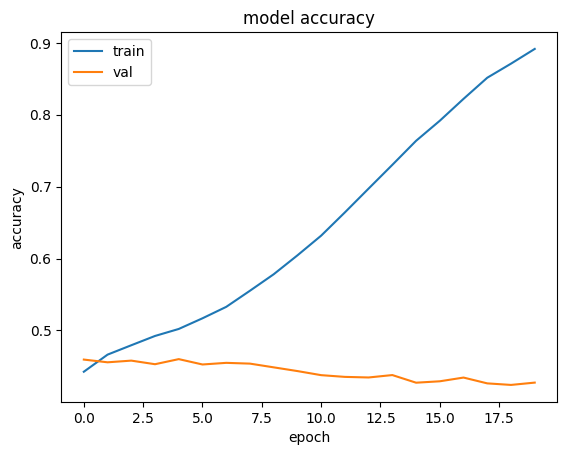

In [18]:
plt.plot(trained_model_5d.history['accuracy'])
plt.plot(trained_model_5d.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

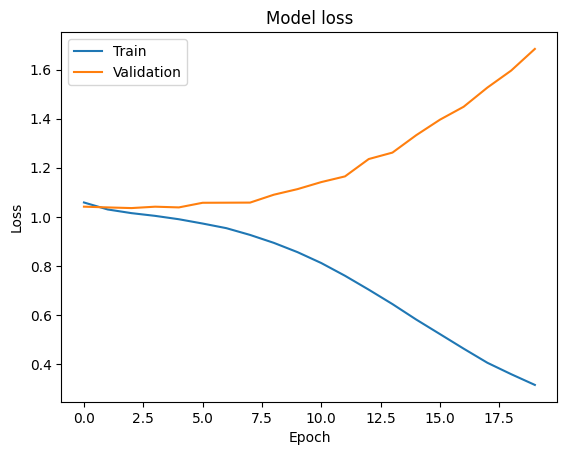

In [19]:
# Plot training & validation loss values
plt.plot(trained_model_5d.history['loss'])
plt.plot(trained_model_5d.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [20]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis = 1)

# Create a classification report using scikit-learn's classification_report function
target_names = ['2', '3', '4'] # replace with your own class names
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

 22/495 [>.............................] - ETA: 1s  

2023-03-26 12:09:46.101703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


495/495 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           2       0.45      0.47      0.46      5203
           3       0.38      0.36      0.37      5348
           4       0.45      0.45      0.45      5277

    accuracy                           0.43     15828
   macro avg       0.43      0.43      0.43     15828
weighted avg       0.43      0.43      0.43     15828

